## 0. 참고 URL
- 구글에 Okt 긍부정 머신러닝 해서 나오는 결과물 중
- 6) 네이버 영화 리뷰 감성 분류하기(Naver Movie Review ... 복붙했습니다
'https://wikidocs.net/44249'

## 1.패키지 및 데이터 불러오기

In [ ]:
!pip install tensorflow

In [ ]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import re
import urllib.request
from konlpy.tag import Okt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
okt = Okt()

In [ ]:
test_data = pd.read_csv("truffle_zzappa_label.csv")
data2 = pd.read_csv("백종원 있는 미역초무침 댓글 2제외.csv")
data3 = pd.read_csv("mara_1-7445.csv")

In [ ]:
data3=data3[data3['label']!=2]

In [ ]:
train_data = pd.concat([data2, data3], axis = 0)

In [ ]:
test_data.head()

,Unnamed: 0,Comments,tokens,label
0,0,솔직히 먹어봤는데 트러플을 접해보지 못한 일반인인 나는 차이를 느끼지 못했다,솔직히 먹어 봤는데 트러플 해보지 일반인 차이 느끼지 했다,0
1,2,그냥 짜파게티에 달걀후라이가 젤 맛있음,그냥 짜파게티 달걀후라이 맛있음,0
2,5,저는 짜파게티 맛이 예전맛이 안나는거 같아서 항상 아쉬웠었는데 트러플 소스 들어가고...,짜파게티 안나는거 같아서 항상 아쉬웠었는데 트러플 소스 들어가고 나서 옜날 어릴 먹...,1
3,7,오 컵라면 뚜껑에 젓가락 끼워놓을 수 있는 곳이 있는줄 몰랐네요ㅋㅋㅋ 완전 꿀팁...,컵라면 뚜껑 젓가락 끼워놓을 있는 있는줄 몰랐네요 완전 꿀팁 트러플 오일 제조 송로...,0
4,10,솔직한 리뷰 잘 봤구요 그냥 트러플 오일 하나 사서 두어 방울 뿌려먹는게 낫겠지 ...,솔직한 리뷰 봤구요 그냥 트러플 오일 하나 사서 두어 방울 뿌려 먹는게 낫겠지 싶네...,0


In [ ]:
del test_data['Unnamed: 0']
del test_data['tokens']

In [ ]:
test_data.head()

,Comments,label
0,솔직히 먹어봤는데 트러플을 접해보지 못한 일반인인 나는 차이를 느끼지 못했다,0
1,그냥 짜파게티에 달걀후라이가 젤 맛있음,0
2,저는 짜파게티 맛이 예전맛이 안나는거 같아서 항상 아쉬웠었는데 트러플 소스 들어가고...,1
3,오 컵라면 뚜껑에 젓가락 끼워놓을 수 있는 곳이 있는줄 몰랐네요ㅋㅋㅋ 완전 꿀팁...,0
4,솔직한 리뷰 잘 봤구요 그냥 트러플 오일 하나 사서 두어 방울 뿌려먹는게 낫겠지 ...,0


In [ ]:
train_data.head()

,Unnamed: 0,Unnamed: 0.1,Comments,tokens,label
0,640,15.0,라면의품격을 한차원 올렸네요 잘먹고갑니다,"['라면', '품격', '을', '차원', '올리다', '먹다', '가다']",1.0
1,643,18.0,미역초비빔면 괜찮아보이네요 ㅎㅎ 원래 오이를 채썰어서 비빔면이랑 같이 비벼서 많이 ...,"['미역', '초', '비빔면', '괜찮다', '보이다', 'ㅎㅎ', '원래', '...",1.0
2,644,19.0,오이오이오이 오늘도 단순하지만 영양가는 꼭 들어가는 한끼이네요 ㅎㅎㅎㅎㅎ 저 까만것...,"['오이오이오이', '오늘', '단순하다', '영양가', '꼭', '들어가다', '...",1.0
3,645,20.0,미역초 비빔면 정말 맛있게 드시네요 저도 한입 먹고싶어요 풀시청하고 갑니다,"['미역', '초', '비빔면', '정말', '맛있다', '들다', '저', '입'...",1.0
4,647,22.0,노다이어트ㅋㅋㅋ 근데 진짜로 건강음식 같네요 먹고싶,"['노', '다이어트', 'ㅋㅋㅋ', '근데', '진짜', '로', '건강', '음...",1.0


In [ ]:
del train_data['Unnamed: 0']
del train_data['Unnamed: 0.1']
del train_data['tokens']

In [ ]:
train_data.head()

,Comments,label
0,라면의품격을 한차원 올렸네요 잘먹고갑니다,1.0
1,미역초비빔면 괜찮아보이네요 ㅎㅎ 원래 오이를 채썰어서 비빔면이랑 같이 비벼서 많이 ...,1.0
2,오이오이오이 오늘도 단순하지만 영양가는 꼭 들어가는 한끼이네요 ㅎㅎㅎㅎㅎ 저 까만것...,1.0
3,미역초 비빔면 정말 맛있게 드시네요 저도 한입 먹고싶어요 풀시청하고 갑니다,1.0
4,노다이어트ㅋㅋㅋ 근데 진짜로 건강음식 같네요 먹고싶,1.0


In [ ]:
print('학습용 리뷰 개수 :',len(train_data))
print('시험용 리뷰 개수 :',len(test_data))

학습용 리뷰 개수 : 1128
시험용 리뷰 개수 : 382


## 2. 데이터 전처리

### 1) 중복데이터 제거

In [ ]:
train_data['Comments'].nunique(), train_data['label'].nunique()

(1116, 2)

In [ ]:
train_data.drop_duplicates(subset=['Comments'], inplace=True)

In [ ]:
print('총 샘플의 수 :',len(train_data))

총 샘플의 수 : 1116


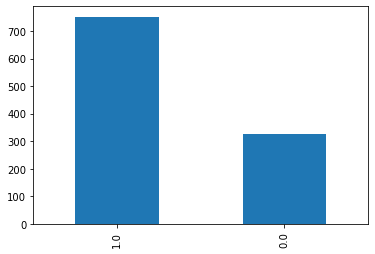

In [ ]:
#라벨링 분포 확인 왜땜시 1이 이렇게 많냐 ㅎㄷㄷ
train_data['label'].value_counts().plot(kind = 'bar');

### 2)널값 제거

In [ ]:
# 널값이 존재하는지 확인
print(train_data.isnull().values.any())

True


In [ ]:
# 어떤칼럼에서 널값이 존재하는지 체크
print(train_data.isnull().sum())

Comments     0
label       38
dtype: int64


In [ ]:
train_data.loc[train_data.label.isnull()].head(5)

,Comments,label
297,내가 잘따르는 마니형 나도 저거 라면 보내주면 안?? ㅋㅋㅋㅋㅋㅋ,NaN
427,이거 개마?遠?개마?遠?1,NaN
671,저는 콜라먹는부분볼려고 시청해?Dㅋㅋㅋㅋㅋ음식먹는것보다 콜라마시장면만보?以빱빱빱빱?...,NaN
744,ㅏ매마뉴마나누?pㅋㅑㄴ매ㅑㄴ어ㅜㅇㅡ?冒칟첸틘疸?매마 뉴마 나누,NaN
780,진짜 미워할 수가 없?い빱빱빱?진짜 미워할 수가 없??2,NaN


In [ ]:
#널값이 존재하는 행 제거 및 재확인
train_data = train_data.dropna(how = 'any') # Null 값이 존재하는 행 제거
print(train_data.isnull().values.any()) 

False


### 3)문자열 정제

In [ ]:
train_data['Comments'] = train_data['Comments'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")
train_data.head()

,Comments,label
0,라면의품격을 한차원 올렸네요 잘먹고갑니다,1.0
1,미역초비빔면 괜찮아보이네요 ㅎㅎ 원래 오이를 채썰어서 비빔면이랑 같이 비벼서 많이 ...,1.0
2,오이오이오이 오늘도 단순하지만 영양가는 꼭 들어가는 한끼이네요 ㅎㅎㅎㅎㅎ 저 까만것...,1.0
3,미역초 비빔면 정말 맛있게 드시네요 저도 한입 먹고싶어요 풀시청하고 갑니다,1.0
4,노다이어트ㅋㅋㅋ 근데 진짜로 건강음식 같네요 먹고싶,1.0


In [ ]:
#정제과정에서 내용이 전체 삭제된 Comments가 있는지 확인
train_data['Comments'].replace('', np.nan, inplace=True)
print(train_data.isnull().sum())

Comments    0
label       0
dtype: int64


## 3. 토큰화
- 훈련 데이터와 테스트 데이터의 토큰화 진행
- 불용어는 테스트데이터에만 처리해주었음

In [ ]:
stopwords = ['께서','에서','이다','에게','으로','이랑','까지','부터','하다',
             '구독','편집', '예쁘', '귀엽', '웃기', '해주세요','카와이', '귀엽', '졸귀', '킬포', 
             '개웃겨', '귀욤', '하이라이트', '현웃', '언니', '형', '매력', '언닌', '귀요', 
             '코로나', '재밌', '행님', '목소리','효과음', '선생님', '잘보고있어요', 
             '드셔', '드시', '재밋게',  '사기', '광고', '소리', '잘생겼', 
             '야하', '섹시', '얼굴', '기여', '기엽', '협찬', 'ppl', '배터', 
             '2019', '2020', 'asmr',  'ASMR', '너무예', '편집', '아이돌',  
             '만명', '구독자', '리액션', '슈기', '지원', '복스럽', '이쁘', 
             '존버', '께서','에서','이다','에게','으로','이랑','까지','부터','하다','구독',
             '예쁘', '귀엽', '웃기', '해주세요','카와이', '귀엽', '졸귀', '킬포', '개웃겨', 
             '귀욤', '하이라이트', '현웃', '언니', '형', '매력', '언닌', '귀요', '코로나', 
             '재밌', '행님', '소리','온니','귀여우시다','율송','사랑스럽다','귀여워요',
             '이쁘세요','눈화장','덩이','섀도우','언닝','구독','여리','동수','귀엽네','드머',
             '예뻐','에드','야하네','오빠','빵터지지','썸네일','섹시해','잘생김', '광고', 
             '단무지', '하세용', '표정', '그릇', '모습', '나름', '귀여워', '이뽀', '웃겨욬', 
             '소리', '이쁘세요', '귀여워요', '존경', '브금', '댓글', '배고파졌어용', '자세한', 
             '리뷰', '재미', '빠르다', '배고파요', '예뻐요', '컨셉', '드세요', '보겠어', 
             '다이어트', '면치기', '쌍수', '햇님', '창의력', '도끼', '텐션', '유튜브', 
             '상남자',  '자막', '귀염', '재밋', '개그맨', '질럿님', '일본', '귀여웡', '강동원', 
             '미래', '살', '째현이', '재현', '주라', '강아지', '잘생기셧어', '잘생', '세아님',
             '잘생겼어요', '오랜만에', '파투님', '숙제', '읽었나요', '카메라', '오빠', '이쁘다',
             '안전운전', '안녕하세요', '채널', '은희', '미미', '새벽', '알람', 
             '개그', '꿀잼', '엔딩', '인트로', '무리', '잠시', '틴트','벤쯔','밴쯔','밴쯔님','배다','쯔','님']

In [ ]:
X_train = []
for sentence in train_data['Comments']:
    temp_X = []
    temp_X = okt.morphs(sentence, stem=True) # 토큰화
    #temp_X = [word for word in temp_X if not word in stopwords] # 불용어 제거
    X_train.append(temp_X)

In [ ]:
X_test = []
for sentence in test_data['Comments']:
    temp_X = []
    temp_X = okt.morphs(sentence, stem=True) # 토큰화
    temp_X = [word for word in temp_X if not word in stopwords] # 불용어 제거
    X_test.append(temp_X)

## 4. 정수인코딩

In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

In [ ]:
print(tokenizer.word_index)

{'먹다': 1, '마르다': 2, '이': 3, '보다': 4, '맛있다': 5, '하다': 6, '에': 7, '탕': 8, '맛': 9, '도': 10, '면': 11, '라면': 12, '저': 13, '은': 14, '미역': 15, '진짜': 16, '비빔면': 17, '같다': 18, '가': 19, '을': 20, '너무': 21, '는': 22, '들다': 23, '안': 24, '넣다': 25, '거': 26, '으로': 27, 'ㅎㅎ': 28, '한': 29, '요': 30, '좋다': 31, '있다': 32, '다': 33, 'ㅋㅋ': 34, '없다': 35, '가다': 36, '못': 37, '님': 38, '한번': 39, '맵다': 40, '이다': 41, '오늘': 42, '들': 43, '보이다': 44, '좋아하다': 45, '보고': 46, 'ㅠㅠ': 47, '오다': 48, '자다': 49, '에서': 50, '만': 51, '나오다': 52, '않다': 53, '되다': 54, '싶다': 55, '냉': 56, '초': 57, '것': 58, 'ㅋㅋㅋ': 59, '전': 60, '만들다': 61, '나다': 62, '나': 63, '잘': 64, '영상': 65, '사먹다': 66, '의': 67, '농심': 68, '더': 69, '를': 70, '많이': 71, '해': 72, '볶음': 73, '아니다': 74, '개': 75, '아': 76, '향': 77, '고': 78, '정말': 79, '오뚜기': 80, '좀': 81, '꼭': 82, '로': 83, 'ㅎ': 84, '국물': 85, '네': 86, '감사하다': 87, '궁금하다': 88, '느낌': 89, '그': 90, '적': 91, '해보다': 92, '팔도': 93, '해먹': 94, '그냥': 95, '음식': 96, '버리다': 97, '왜': 98, 'ㅠ': 99, '제': 100, '맛없다': 101, '냄새': 102, '때': 103, 

- 위에서 정수는 등장빈도가 높은 순서로 부여 즉 뒤로 갈수록 등장빈도가 낮다는 것을 의미
- 이때 등장빈도가 2회 미만인 (1회인) 토큰이 등장하는 비율은 8%밖에 되지 않으므로 제거

In [ ]:
threshold = 2
total_cnt = len(tokenizer.word_index) # 단어의 수
rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
for key, value in tokenizer.word_counts.items():
    total_freq = total_freq + value

    # 단어의 등장 빈도수가 threshold보다 작으면
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('단어 집합(vocabulary)의 크기 :',total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

단어 집합(vocabulary)의 크기 : 2550
등장 빈도가 1번 이하인 희귀 단어의 수: 1370
단어 집합에서 희귀 단어의 비율: 53.72549019607843
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 8.268453135373287


In [ ]:
vocab_size = total_cnt - rare_cnt + 1
print('단어 집합의 크기 :',vocab_size)

단어 집합의 크기 : 1181


In [ ]:
tokenizer = Tokenizer(vocab_size, oov_token = 'OOV') 
tokenizer.fit_on_texts(X_train)
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

In [ ]:
#문장별로 정수인코딩이 진행되었는지 확인
print(X_train[:3])

[[13, 68, 1, 21, 30, 1, 276, 65, 2, 37], [16, 58, 18, 163, 45, 29, 383, 221, 71, 629, 501, 18, 136, 277, 255, 72, 2, 87, 384, 20, 4, 39, 15, 221, 71, 385, 24, 35, 43, 11, 796, 54, 502, 74, 177, 206, 15, 75, 143, 2, 177, 20, 1, 55, 59, 19, 29], [1, 43, 11, 1, 797, 23, 83, 193, 30, 164, 178, 31, 386, 14, 1, 16, 278]]


In [ ]:
y_train = np.array(train_data['label']) #학습 자료의 라벨을 y_train으로
y_test = np.array(test_data['label']) #테스트 자료의 라벨을 y_test로

- 위에서 제거했던 단어의 공백을 제거

In [ ]:
drop_train = [index for index, sentence in enumerate(X_train) if len(sentence) < 1]

In [ ]:
#1160에서 1078로 학습데이터가 줄었당
X_train = np.delete(X_train, drop_train, axis=0)
y_train = np.delete(y_train, drop_train, axis=0)
print(len(X_train))
print(len(y_train))

1078
1078


## 5.패딩
- 리뷰길이를 유사하게 맞춰 모델이 데이터를 처리하는데 오류가 없도록 한다

리뷰의 최대 길이 : 214
리뷰의 평균 길이 : 15.37012987012987


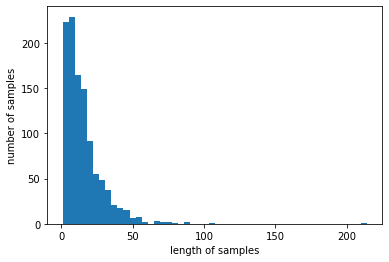

In [ ]:
print('리뷰의 최대 길이 :',max(len(l) for l in X_train))
print('리뷰의 평균 길이 :',sum(map(len, X_train))/len(X_train))
plt.hist([len(s) for s in X_train], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [ ]:
def below_threshold_len(max_len, nested_list):
    cnt = 0
    for s in nested_list:
        if(len(s) <= max_len):
            cnt = cnt + 1
    print('전체 샘플 중 길이가 %s 이하인 샘플의 비율: %s'%(max_len, (cnt / len(nested_list))*100))

In [ ]:
max_len = 40
below_threshold_len(max_len, X_train)

전체 샘플 중 길이가 40 이하인 샘플의 비율: 95.17625231910947


In [ ]:
X_train = pad_sequences(X_train, maxlen = max_len)
X_test = pad_sequences(X_test, maxlen = max_len)

## 6.감성분류

In [ ]:
from tensorflow.keras.layers import Embedding, Dense, LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [ ]:
model = Sequential()
model.add(Embedding(vocab_size, 100))
model.add(LSTM(128))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)
mc = ModelCheckpoint('best_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

In [ ]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(X_train, y_train, epochs=15, callbacks=[es, mc], batch_size=60, validation_split=0.2)

Epoch 1/15
15/15 [==============================] - ETA: 0s - loss: 0.6278 - acc: 0.7216
Epoch 00001: val_acc improved from -inf to 0.56944, saving model to best_model.h5
15/15 [==============================] - 1s 83ms/step - loss: 0.6278 - acc: 0.7216 - val_loss: 0.6674 - val_acc: 0.5694
Epoch 2/15
14/15 [===========================>..] - ETA: 0s - loss: 0.5278 - acc: 0.7357
Epoch 00002: val_acc improved from 0.56944 to 0.60648, saving model to best_model.h5
15/15 [==============================] - 0s 32ms/step - loss: 0.5314 - acc: 0.7320 - val_loss: 0.6353 - val_acc: 0.6065
Epoch 3/15
14/15 [===========================>..] - ETA: 0s - loss: 0.4261 - acc: 0.7929
Epoch 00003: val_acc improved from 0.60648 to 0.71296, saving model to best_model.h5
15/15 [==============================] - 0s 31ms/step - loss: 0.4264 - acc: 0.7912 - val_loss: 0.5860 - val_acc: 0.7130
Epoch 4/15
13/15 [=========================>....] - ETA: 0s - loss: 0.3249 - acc: 0.8577
Epoch 00004: val_acc improved fr

In [ ]:
loaded_model = load_model('best_model.h5')
print("\n 테스트 정확도: %.4f" % (loaded_model.evaluate(X_test, y_test)[1]))

12/12 [==============================] - 0s 7ms/step - loss: 0.5467 - acc: 0.7880

 테스트 정확도: 0.7880


In [ ]:
def sentiment_predict(new_sentence):
    new_sentence = okt.morphs(new_sentence, stem=True) # 토큰화
    new_sentence = [word for word in new_sentence if not word in stopwords] # 불용어 제거
    encoded = tokenizer.texts_to_sequences([new_sentence]) # 정수 인코딩
    pad_new = pad_sequences(encoded, maxlen = max_len) # 패딩
    score = float(loaded_model.predict(pad_new)) # 예측
            
    if score > 0.5:
        label = 1
    else: 
        label = 0    
    return(label)

In [ ]:
sinsin = pd.read_csv('신라면건면_Raw.csv',encoding='cp949')
garlic = pd.read_csv('갈릭버터_Raw.csv',encoding='cp949')

In [ ]:
label_list = []
comment_list = list(garlic['Comments'])
print(comment_list)

['갈릭버터볶음면!!저도먹어볼게요^^*', '맛있을것같아요!겉포장도이쁘네요', '5:43첫입', 'ㅠㅠ밴쯔님ㅠㅠㅠㅠ맛표현좀제대로해주셧으면조켓어요..ㅋㅋㅋㅋ애가타는마음,,,ㅠㅠ맨날궁금증만더커져서감미당~', '컵라면5개가밴쯔님한테는왜이리적어보일까요ㅋㅋ제가먹으면2개먹고느끼해서못먹겠지만요ㅋㅋㅋ', '아니...어떻게한젓가락이1인분같은데두세번씹고넘기지....목구멍이어떻게생긴거야.......', '밴쯔님!안성탕면해물로새로나왔어요!!다음먹방으로부탁드려요!!지금먹고있는데맛괜찮네요!벌써4개째먹고있습니다ㅜㅜ', 'honestlylookgoodalsoiffullofconservantkkkk', '벤쯔님쫌씹고삼키세욬ㅋㅋㅋ너무안씹고삼키시는거같아요그면몸에안좋아용ㅎㅎ', '이거짱맛있어요ㅠㅠ버터향도나고마늘향도나고근데매콤해.대존맛.한번만드셔보세요??????', '라면이나음식리뷰는밴쯔님채널에서', '오늘학교에서힘들었는데밴쯔님영상보니까기분이좋아지네요??', '첫입먹고다섯번도안씹는거같은ㅋㅋ진공청소기느낌이네요', '저거먹어봤는데진짜맛있던데이거보니까편의점가야겠네...', '그릇이세숫대야같아요ㅋㅋ', 'MuchloveasalwaysfortheEnglishsubs????????', '보디빌더대회준비중밴쯔님먹방보면서항상대리만족합니다저도하루빨리대회끝나고밴쯔님처럼폭풍흡힙하는날이왔으면좋겠습니다ㅠㅠ', 'IappreciatetheenglishSUB!!:D', '이거맛있어요알바하면서자주먹었어요', '편의점에서이거먹고집에오는길인데소름이네요ㅎㅎㅎㅎㅎㅎㅎ와우', '오오!!!', 'Garlicfriedsoundsfantastic,thanksfortheEnglishsubtitlesIloveyourvideos', '맛있겠어요..저씨유알반데먹어봐야할듯', '배고파ㅠㅜㅠ', '6:03라면을스파게티처럼드시네요ㅋㅋㅋ', "Youveryclearlydon'tlikeit,butyoufinishit.Thaaaatisdedication!LoveyouBanzz!SupportfromCanada!????????????????", '4:35트트로

In [ ]:
label_list = []
for item in comment_list:
    label_list.append(sentiment_predict(item))

In [ ]:
garlic['label']=label_list
garlic.head(50)

,Comments,label
0,갈릭버터볶음면!!저도먹어볼게요^^*,1
1,맛있을것같아요!겉포장도이쁘네요,1
2,5:43첫입,0
3,"ㅠㅠ밴쯔님ㅠㅠㅠㅠ맛표현좀제대로해주셧으면조켓어요..ㅋㅋㅋㅋ애가타는마음,,,ㅠㅠ맨날궁금...",0
4,컵라면5개가밴쯔님한테는왜이리적어보일까요ㅋㅋ제가먹으면2개먹고느끼해서못먹겠지만요ㅋㅋㅋ,1
5,아니...어떻게한젓가락이1인분같은데두세번씹고넘기지....목구멍이어떻게생긴거야.......,0
6,밴쯔님!안성탕면해물로새로나왔어요!!다음먹방으로부탁드려요!!지금먹고있는데맛괜찮네요!벌...,1
7,honestlylookgoodalsoiffullofconservantkkkk,1
8,벤쯔님쫌씹고삼키세욬ㅋㅋㅋ너무안씹고삼키시는거같아요그면몸에안좋아용ㅎㅎ,0
9,이거짱맛있어요ㅠㅠ버터향도나고마늘향도나고근데매콤해.대존맛.한번만드셔보세요??????,1
